# SSA

In [1]:
import matlab.engine
import numpy as np
from numpy import pi as pi
import seaborn as sns
import matplotlib.pyplot as plt
import cmocean
from benchmark_demo.utilstf import *
from benchmark_demo.SignalBank import SignalBank
from benchmark_demo.benchmark_utils import MatlabInterface
from methods.method_ssa_denoising import NewMethod
import sys
import os

ModuleNotFoundError: No module named 'methods.method_ssa_denoising'

In [ ]:
# A test for new methods
np.random.seed(0) 

# signal parameters
SNRin = 10
N = 2**10
Nsub=N//2
sbank = SignalBank(N=N, return_signal=True)
# s = sbank.signal_cos_chirp()
# s = sbank.signal_mc_multi_linear()
# s = sbank.signal_mc_cos_plus_tone()
# s = sbank.signal_mc_modulated_tones()
s = sbank.signal_mc_synthetic_mixture()
# s = sbank.signal_mc_synthetic_mixture()
# s = sbank.signal_mc_impulses()
s = sbank.signal_mc_on_off_2()
signal, noise = add_snr(s,SNRin)
# signal = s + noise*np.sqrt(N/Nsub) 

snr_out:9.999999999999998


In [ ]:
Nfft = 2*N
g,_ = get_round_window(Nfft)
S, F = get_spectrogram(signal, window = g)
F = F[0:N+1]

methodml = NewMethod()
funa = methodml.method

# method_ssa_decomp(signal, n_components, L, epsilon)
signal_output = funa(signal,[],[],[])

S_output, F_output= get_spectrogram(signal_output, window=g)
F_output = F_output[0:N+1]

print(10*np.log10((np.sum(s**2))/(np.sum((s-signal_output)**2))))

9.998617114305459


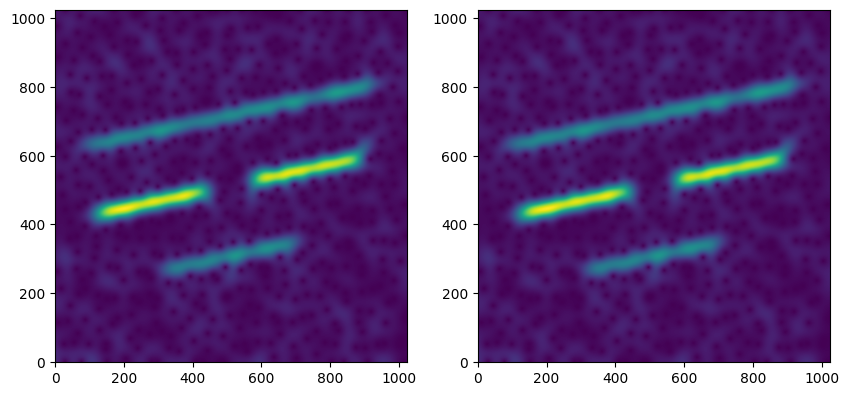

In [ ]:
fig, ax = plt.subplots(1,2,figsize = (10,5))
ax[0].imshow(abs(F), origin='lower')#, cmap=cmocean.cm.deep)
ax[1].imshow(abs(F_output), origin='lower')#, cmap=cmocean.cm.deep)
plt.show()


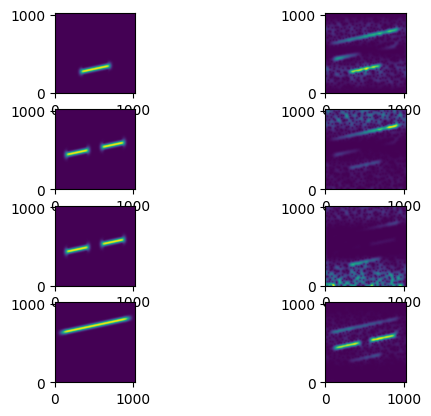

In [ ]:
# method_ssa_decomp(signal, n_components, L, epsilon)
signal_output = funa(signal,[],5,1e-6,True)

fig, axs = plt.subplots(signal.total_comps,2)

for i in range(signal.total_comps):
    S, F = get_spectrogram(signal.comps[i], window = g)
    F = F[0:N+1]
    S_output, F_output = get_spectrogram(signal_output[i], window = g)
    F_output = F_output[0:N+1]

    axs[i,0].imshow(abs(F), origin='lower')#, cmap=cmocean.cm.deep)
    axs[i,1].imshow(abs(F_output), origin='lower')#, cmap=cmocean.cm.deep)

plt.show()

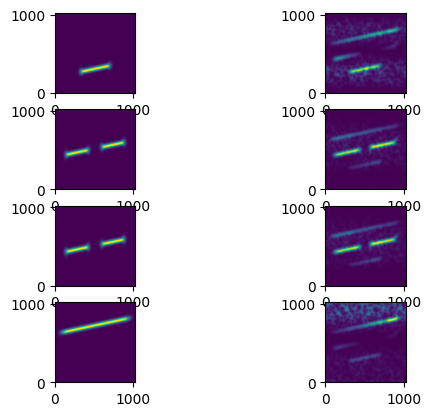

In [ ]:
from benchmark_demo.perf_metrics import order_components

order = order_components(signal_output,signal.comps)

fig, axs = plt.subplots(signal.total_comps,2)

for i in range(signal.total_comps):
    
    S, F = get_spectrogram(signal.comps[i], window = g)
    F = F[0:N+1]
    S_output, F_output = get_spectrogram(signal_output[order[i]], window = g)
    F_output = F_output[0:N+1]

    axs[i,0].imshow(abs(F), origin='lower')#, cmap=cmocean.cm.deep)
    axs[i,1].imshow(abs(F_output), origin='lower')#, cmap=cmocean.cm.deep)